In [2]:
import numpy as np
import matplotlib.pyplot as plt


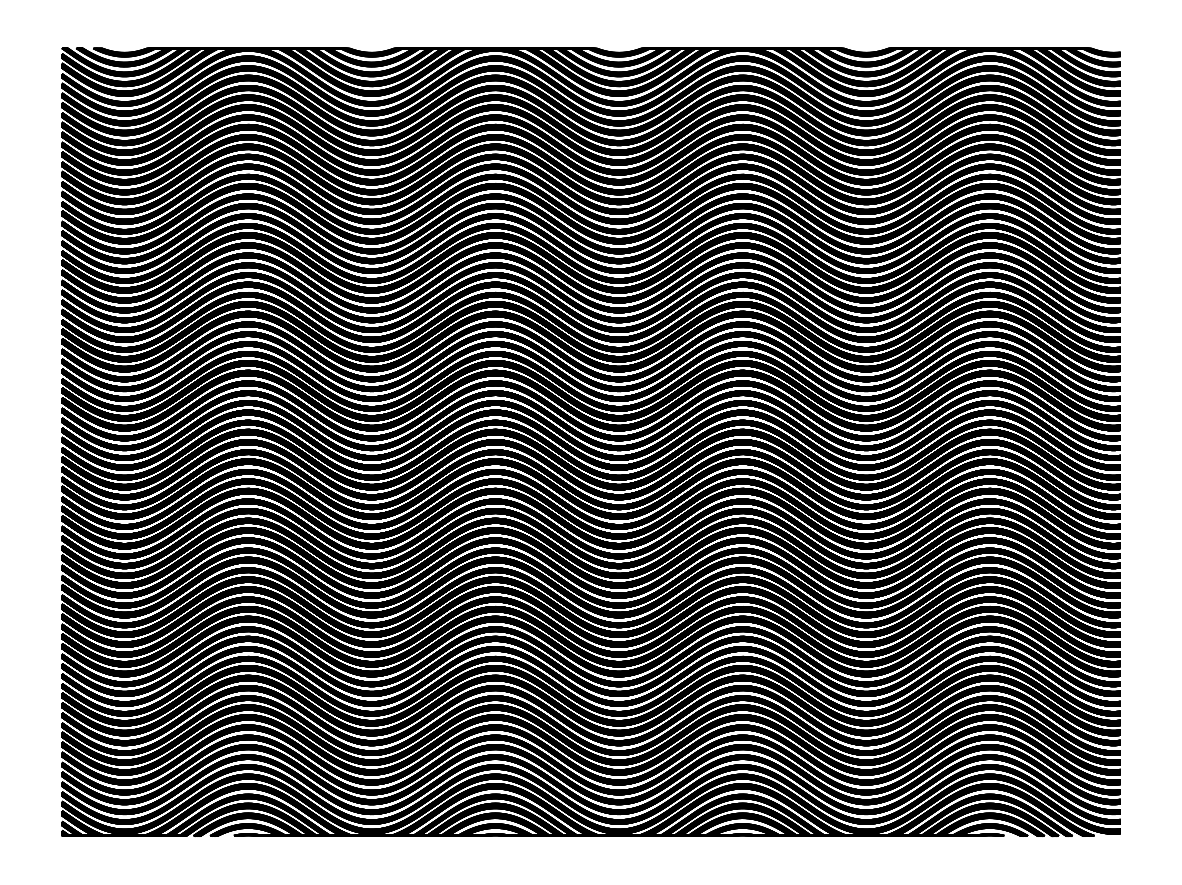

In [2]:
num_repeat = 40
num_sines = 100
max_repeat_line = 20

x = np.linspace(np.pi, 12*np.pi, 10000)

for sine_wave_shift in range(num_sines):
    for thick_shift in range(np.random.randint(10,13)):
        repeat_line = int(np.round((1 - np.abs((num_sines/2 - sine_wave_shift)) / (num_sines/2))* max_repeat_line, 0)+1)
        y = np.sin(x)*.7 + thick_shift*0.01 + sine_wave_shift*0.25
        coords = np.column_stack((x, y))
        x_mask = (coords[:, 0] >= 0) & (coords[:, 0] <= 30)
        y_mask = (coords[:, 1] >= 3) & (coords[:, 1] <= 23)
        filtered = coords[x_mask & y_mask]
        for _ in range(repeat_line):
            plt.plot(filtered[:, 0], filtered[:, 1], 'k-')
    
    if num_repeat > 2:
        num_repeat -=1

plt.axis('off')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(15, 15)
plt.savefig('fade_sine.svg')
plt.show()

In [3]:
num_repeat = 40
num_sines = 100
max_repeat_line = 50

lines = []
for sine_wave_shift in range(num_sines):
    repeat_line = np.round((1 - np.abs((num_sines/2 - sine_wave_shift)) / (num_sines/2))* max_repeat_line, 0)+1
    lines.append(repeat_line)

print(lines)



[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 50.0, 49.0, 48.0, 47.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41.0, 40.0, 39.0, 38.0, 37.0, 36.0, 35.0, 34.0, 33.0, 32.0, 31.0, 30.0, 29.0, 28.0, 27.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0]


In [4]:
num_repeat = 40
num_sines = 100
max_repeat_line = 20

x = np.linspace(np.pi, 12*np.pi, 10000)

for sine_wave_shift in range(num_sines):
    for thick_shift in range(np.random.randint(10,13)):
        repeat_line = int(np.round((1 - np.abs((num_sines/2 - sine_wave_shift)) / (num_sines/2))* max_repeat_line, 0)+1)
        y = np.sin(x)*.7 + thick_shift*0.01 + sine_wave_shift*0.25
        coords = np.column_stack((x, y))
        x_mask = (coords[:, 0] >= 0) & (coords[:, 0] <= 30)
        y_mask = (coords[:, 1] >= 3) & (coords[:, 1] <= 23)
        filtered = coords[x_mask & y_mask]
        for _ in range(repeat_line):
            plt.plot(filtered[:, 0], filtered[:, 1], 'k-')
    
    if num_repeat > 2:
        num_repeat -=1

plt.axis('off')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(15, 15)
plt.savefig('fade_sine.svg')
plt.show()

X-delta: 0.03455751918948772
X-delta check: 0.003456097528701463


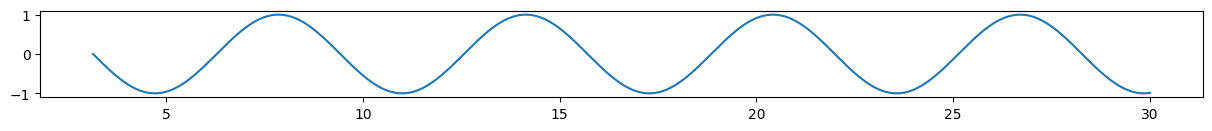

Len filtered: 7772


In [86]:
x_start = np.pi
x_stop = 12*np.pi
points = 1000

x_delta = (x_stop - x_start)/points
print(f'X-delta: {x_delta}')

x = np.linspace(np.pi, 12*np.pi, 10000)
print(f'X-delta check: {x[1]-x[0]}')
y = np.sin(x)

coords = np.column_stack((x, y))
x_mask = (coords[:, 0] >= 0) & (coords[:, 0] <= 30)
y_mask = (coords[:, 1] >= -2) & (coords[:, 1] <= 2)

filtered = coords[x_mask & y_mask]

plt.plot(filtered[:, 0], filtered[:, 1])
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(15, 15)
plt.show()

print(f'Len filtered: {len(filtered)}')

In [68]:
def filtered_coords_to_segments(filtered, x_delta):
    segments, cur_segment = [], [filtered[0]]

    for idx, coord in enumerate(filtered):
        if idx == 0:
            continue
        if coord[0] - cur_segment[-1][0] <= x_delta:
            cur_segment.append(coord)
        else:
            segments.append(cur_segment)
            cur_segment = [coord]
    
    segments.append(cur_segment)

    return [np.array(seg) for seg in segments]


New segment


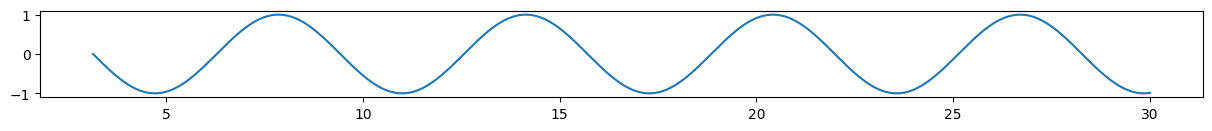

Len segments: 1


In [69]:
x_start = np.pi
x_stop = 12*np.pi
points = 1000

x_delta = (x_stop - x_start)/points

segments = filtered_coords_to_segments(filtered, x_delta)

for seg in segments:
    print('New segment')
    plt.plot(seg[:, 0], seg[:, 1])


plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(15, 15)
plt.show()

print(f'Len segments: {len(segments)}')

In [63]:
len(segments)

1

X-delta new: 0.0036


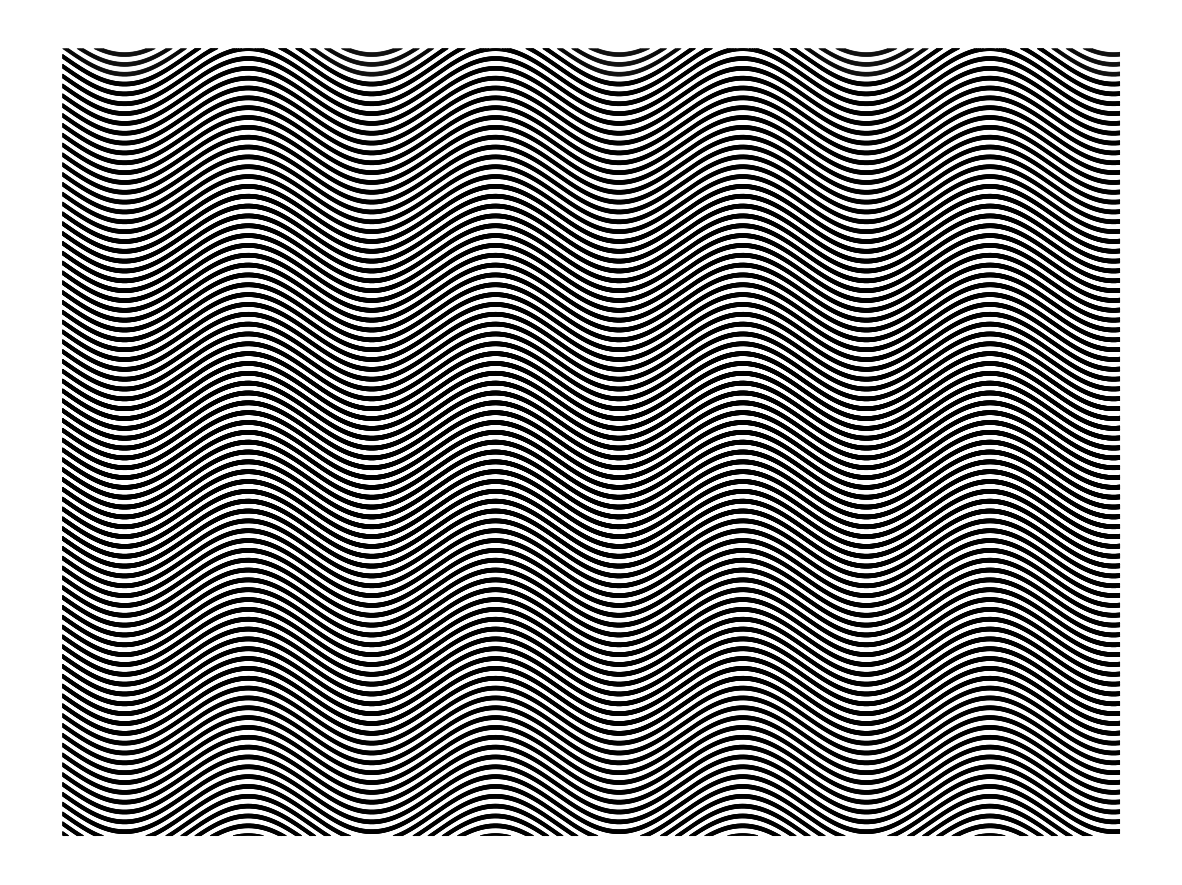

In [113]:
num_repeat = 40
num_sines = 100
max_repeat_line = 3

x_start = np.pi
x_stop = 12*np.pi
points = 10000
x = np.linspace(x_start, x_stop, points)

x_delta = np.round(x[1]-x[0], 4) + .0001

print(f'X-delta new: {x_delta}')

for sine_wave_shift in range(num_sines):
    for thick_shift in range(11):
        repeat_line = int(np.round((1 - np.abs((num_sines/2 - sine_wave_shift)) / (num_sines/2))* max_repeat_line, 0)+1)
        y = np.sin(x)*.7 + thick_shift*0.01 + sine_wave_shift*0.25
        coords = np.column_stack((x, y))
        x_mask = (coords[:, 0] >= 0) & (coords[:, 0] <= 30)
        y_mask = (coords[:, 1] >= 3) & (coords[:, 1] <= 23)
        filtered = coords[x_mask & y_mask]
        
        if len(filtered) > 0:
            segments = filtered_coords_to_segments(filtered, x_delta)
            # print(f'Sine wave {sine_wave_shift}. Repeat lines: {repeat_line}')
            for _ in range(repeat_line):
                for seg in segments:
                    plt.plot(seg[:, 0], seg[:, 1], 'k-', linewidth=.5)
    
    if num_repeat > 2:
        num_repeat -=1

plt.axis('off')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(15, 15)
plt.savefig('fade_sine.svg')
plt.show()

Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100
Len filtered: 100. Len segments: 100


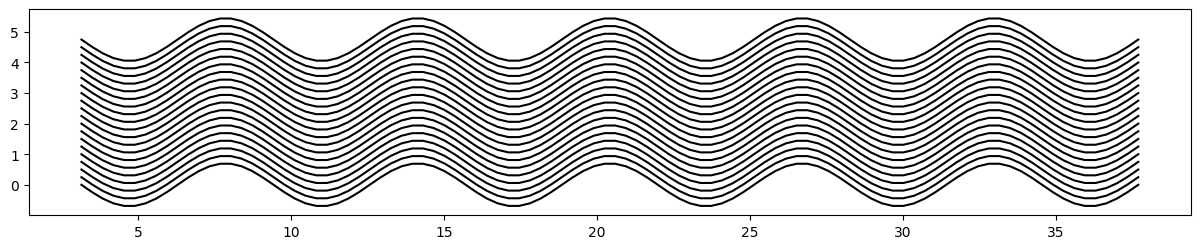

In [85]:
num_repeat = 40
num_sines = 20
max_repeat_line = 2

x_start = np.pi
x_stop = 12*np.pi
points = 100

x_delta = (x_stop - x_start)/points

x = np.linspace(x_start, x_stop, points)

thick_shift=0

for sine_wave_shift in range(num_sines):
    repeat_line = int(np.round((1 - np.abs((num_sines/2 - sine_wave_shift)) / (num_sines/2))* max_repeat_line, 0)+1)
    y = np.sin(x)*.7 + thick_shift*0.01 + sine_wave_shift*0.25
    coords = np.column_stack((x, y))
    x_mask = (coords[:, 0] >= -10) & (coords[:, 0] <= 50)
    y_mask = (coords[:, 1] >= -30) & (coords[:, 1] <= 300)
    filtered = coords[x_mask & y_mask]
    
    plt.plot(filtered[:, 0], filtered[:, 1], 'k-')

    if len(filtered) > 0:
        segments = filtered_coords_to_segments(filtered, x_delta)
        print(f'Len filtered: {len(filtered)}. Len segments: {len(segments)}')
        for seg in segments:
            plt.plot(seg[:, 0], seg[:, 1], 'r-')
    
    
    if num_repeat > 2:
        num_repeat -=1

# plt.axis('off')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(15, 15)
plt.savefig('fade_sine.svg')
plt.show()

[array([[3.14159265, 4.75      ]]), array([[3.17618476, 4.72579035]]), array([[3.21077688, 4.70160967]]), array([[3.24536899, 4.67748689]]), array([[3.2799611 , 4.65345086]]), array([[3.31455321, 4.62953036]]), array([[3.34914532, 4.605754  ]]), array([[3.38373743, 4.58215023]]), array([[3.41832954, 4.55874729]]), array([[3.45292166, 4.53557319]]), array([[3.48751377, 4.51265564]]), array([[3.52210588, 4.49002208]]), array([[3.55669799, 4.46769957]]), array([[3.5912901 , 4.44571484]]), array([[3.62588221, 4.42409419]]), array([[3.66047432, 4.40286348]]), array([[3.69506643, 4.38204811]]), array([[3.72965855, 4.361673  ]]), array([[3.76425066, 4.34176252]]), array([[3.79884277, 4.3223405 ]]), array([[3.83343488, 4.30343016]]), array([[3.86802699, 4.28505415]]), array([[3.9026191 , 4.26723444]]), array([[3.93721121, 4.24999235]]), array([[3.97180332, 4.23334853]]), array([[4.00639544, 4.21732287]]), array([[4.04098755, 4.20193456]]), array([[4.07557966, 4.18720201]]), array([[4.11017177,

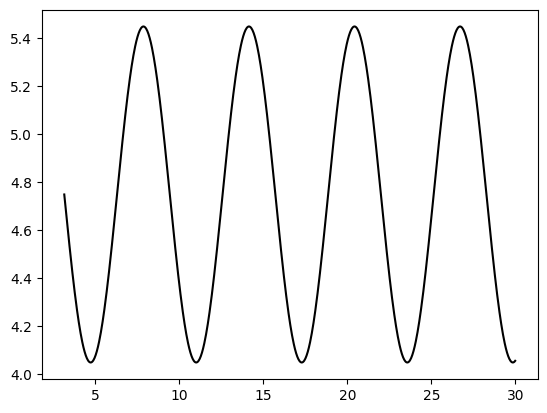

In [44]:
segments = filtered_coords_to_segments(filtered, x_delta)
print(segments)

plt.plot(filtered[:, 0], filtered[:, 1], 'k-')

plt.show()